In [ ]:
from google.colab import drive
from google.colab import drive 
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
################# import statements #################
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm 
from statsmodels.formula.api import logit 

In [ ]:
biotech=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/Smaller Class Data/biotech/final_biotech.csv')
diag_analytics=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/Smaller Class Data/tier1/manufacture_diag_anlyt.csv')
eqpt=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/Smaller Class Data/tier1/manufacture_eqpt.csv')
lab_rsrch=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/Smaller Class Data/tier1/lab_rsrch.csv')

Biotech

In [ ]:
last_financing_deal_type_biotech=biotech[['Last_Financing_Deal_Type']]
first_financing_deal_type_biotech=biotech[['Last_Financing_Deal_Type']]
us,cs=np.unique(last_financing_deal_type_biotech, return_counts=True)

In [ ]:
list_good=['Buyout/LBO', 'Corporate', 'IPO', 'Later Stage VC', 'Merger/Acquisition', 'PE Growth/Expansion']
list_bad=[]
for n in list(us): 
  if n not in list_good:
    list_bad.append(n)


Daignostic Analytics

In [ ]:
last_financing_deal_type_biotech=diag_analytics[['last financing deal type']]
us,cs=np.unique(last_financing_deal_type_biotech, return_counts=True)

list_good=['Buyout/LBO', 'Corporate', 'IPO', 'Later Stage VC', 'Merger/Acquisition', 'PE Growth/Expansion']
list_bad=[]
for n in list(us): 
  if n not in list_good:
    list_bad.append(n)

Equiptment 

In [ ]:
last_financing_deal_type_biotech=eqpt[['last financing deal type']]
us,cs=np.unique(last_financing_deal_type_biotech, return_counts=True)

list_good=['Buyout/LBO', 'Corporate', 'IPO', 'Later Stage VC', 'Merger/Acquisition', 'PE Growth/Expansion']
list_bad=[]
for n in list(us): 
  if n not in list_good:
    list_bad.append(n)

Lab reserach 

In [ ]:
last_financing_deal_type_biotech=lab_rsrch[['last financing deal type']]
us,cs=np.unique(last_financing_deal_type_biotech, return_counts=True)

list_good=['Buyout/LBO', 'Corporate', 'IPO', 'Later Stage VC', 'Merger/Acquisition', 'PE Growth/Expansion']
list_bad=[]
for n in list(us): 
  if n not in list_good:
    list_bad.append(n)

In [ ]:
def find_bad_good(biotech):
  bad_category_row_index=[]
  good_category_row_index=[]
  except_index=[]
  for n in range(biotech.shape[0]):
    try:
      if biotech.loc[n]['last financing deal type'] not in list_bad: 
        bad_category_row_index.append(n)
      else:
        good_category_row_index.append(n)
    except KeyError:
      except_index.append(n)
  return bad_category_row_index, good_category_row_index


In [ ]:
def find_final_var(biotech):
  X=biotech[['State_incorporation', 'Type_entity',
  'LOCAL', 'TRADED','five', 'ten', 'thirteen', 'twentythree', 'twentyfour',
  'thirty', 'oneothree', 'oneoseven',
  'onefourteen', 'Num of name','fame included', 'last financing deal type']]
  return X


In [ ]:
def form_final_data(bad_category_row_index, good_category_row_index, X, name_file):
  final_copy=X.copy(deep=True)

  for n in range(final_copy.shape[0]):
    n_item=final_copy.loc[n]['last financing deal type']
    if n_item!=1: 
      if n_item!=0:  
        if n_item in list_bad: 
          final_copy.at[n,'last financing deal type']=0
        else: 
          final_copy.at[n,'last financing deal type']=1

  for n in range(final_copy.shape[0]):
    n_item=final_copy.loc[n]['State_incorporation']
    if n_item=='Delaware': 
      final_copy.at[n,'State_incorporation']=1
    else: 
      final_copy.at[n,'State_incorporation']=0

  for n in range(final_copy.shape[0]):
    n_item=final_copy.loc[n]['Type_entity']
    if n_item=='Corporate': 
      final_copy.at[n,'Type_entity']=1
    else: 
      final_copy.at[n,'Type_entity']=0

  for n in range(final_copy.shape[0]):
    n_item=final_copy.loc[n]['Num of name']
    if n_item>3: 
      final_copy.at[n,'Num of name']=1
    else: 
      final_copy.at[n,'Num of name']=0
  final_copy.to_csv('/drive/My Drive/Healthcare UROP/Fall 2022/'+name_file)


Biotech

In [ ]:
bad_category_row_index, good_category_row_index=find_bad_good(biotech)
X=find_final_var(biotech)
name_file='new_biotech.csv'
form_final_data(bad_category_row_index, good_category_row_index, X, name_file)

Diagnostic Analytics

In [ ]:
bad_category_row_index, good_category_row_index=find_bad_good(diag_analytics)
X=find_final_var(diag_analytics)
name_file='new_diag_analytics.csv'
form_final_data(bad_category_row_index, good_category_row_index, X, name_file)

manufacture_eqpt

In [ ]:
bad_category_row_index, good_category_row_index=find_bad_good(diag_analytics)
X=find_final_var(diag_analytics)
name_file='new_eqpt.csv'
form_final_data(bad_category_row_index, good_category_row_index, X, name_file)

lab research

In [ ]:
bad_category_row_index, good_category_row_index=find_bad_good(lab_rsrch)
X=find_final_var(lab_rsrch)
name_file='new_lab.csv'
form_final_data(bad_category_row_index, good_category_row_index, X, name_file)

In [ ]:
new=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/combined.csv')

In [ ]:
#new.info()
#new.describe()

train_data, test_data=train_test_split(new, test_size=0.2, random_state=42)
#formula=('Last_Financing_Deal_Type ~ State_incorporation+TRADED+five+thirteen+twentythree+oneothree+Num_of_name+fame_included')
formula=('Last_Financing_Deal_Type ~ State_incorporation+TRADED+five+thirteen+twentythree+Num_of_name+fame_included')

model=logit(formula=formula, data=train_data).fit()
model.summary()

         Current function value: 0.666426
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                              
====================================================================================
Dep. Variable:     Last_Financing_Deal_Type   No. Observations:                  587
Model:                                Logit   Df Residuals:                      579
Method:                                 MLE   Df Model:                            7
Date:                      Thu, 16 Mar 2023   Pseudo R-squ.:                 0.03196
Time:                              13:37:33   Log-Likelihood:                -391.19
converged:                            False   LL-Null:                       -404.11
Covariance Type:                  nonrobust   LLR p-value:                 0.0005409
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3878      0.463     -0.838      0.402      -1.295       0.520
State_incorporation    -0.0556      0.172     -0.324      0.746      -0.392       0.281
TRADED                  0.2625        nan        nan        nan         nan         nan
five                    0.4228        nan        nan        nan         nan         nan
thirteen               -0.3672        nan        nan        nan         nan         nan
twentythree             0.2069        nan        nan        nan         nan         nan
Num_of_name             0.0115      0.326      0.035      0.972      -0.627       0.650
fame_included          22.0745   2.56e+04      0.001      0.999   -5.01e+04    5.01e+04
=======================================================================================
"""

In [ ]:
AME=model.get_margeff(at="overall", method="dydx")
print(AME.summary())

           Logit Marginal Effects          
Dep. Variable:     Last_Financing_Deal_Type
Method:                                dydx
At:                                 overall
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
State_incorporation    -0.0132      0.041     -0.324      0.746      -0.093       0.067
TRADED                  0.0624        nan        nan        nan         nan         nan
five                    0.1004        nan        nan        nan         nan         nan
thirteen               -0.0872        nan        nan        nan         nan         nan
twentythree             0.0491        nan        nan        nan         nan         nan
Num_of_name             0.0027      0.077      0.035      0.972      -0.149       0.154
fame_included           5.2441   6070.264      0.001      0.999   -1.19e+04    1.19e+04


/usr/local/lib/python3.9/dist-packages/statsmodels/discrete/discrete_margins.py:343: RuntimeWarning: invalid value encountered in sqrt
  return cov_me, np.sqrt(np.diag(cov_me))


In [ ]:
import numpy as np 
from sklearn.metrics import classification_report, accuracy_score
prediction=model.predict(exog=test_data)
cutoff=0.5
y_prediction = np.where(prediction > cutoff,1,0)
y_actual=test_data["Last_Financing_Deal_Type"]
conf_matrix=pd.crosstab(y_actual, y_prediction, rownames=["Actual"], colnames=["Predicted"], margins=True)
print(conf_matrix)

Predicted   0   1  All
Actual                
0          53  31   84
1          30  33   63
All        83  64  147


In [ ]:
#Accuracy 
accuracy=accuracy_score(y_actual, y_prediction)
print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.59%


In [ ]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.64      0.63      0.63        84
           1       0.52      0.52      0.52        63

    accuracy                           0.59       147
   macro avg       0.58      0.58      0.58       147
weighted avg       0.59      0.59      0.59       147



Fall 2022 UROP 

In [ ]:
final_naic=list(final["NAICS"])
uni, counts=np.unique(final_naic, return_counts=True)


array(['325212', '325411', '325412', '325413', '325414', '333314',
       '334413', '334510', '334515', '334516', '334517', '339112',
       '339113', '339114', '339115', '339116', '423450', '423460',
       '424210', '446110', '446130', '524113', '524113\n524126', '524114',
       '524114\n525190', '524126\n525190', '524127', '524210', '524298',
       '532283', '541714', '541715', '621111', '621111\n621112', '621210',
       '621310', '621320', '621330', '621391', '621399', '621492',
       '621498', '621511', '621610', '621999', '622110', '622210',
       '623110', '623311', '624120', '812210', '812220', 'nan'],
      dtype='<U32')

Tier 1 

manufacturing 

325411: medicinal and botanical manufacturing 

325412: pharmaceutical preparation manufacturing 

325412: pharmaceutical preparation manufacturing 

325413: In-vitro diagnostic substance manufacturing 

325414: Biologiacl product (except diagnostic) manufacturing

333314: Optical instrument and lens manufacturing (small business) 

334510: electromedical and electrotherapetic apparartus manufacturing 

334517: manufacturing irradiation apparatus and tubes for applications, such as medical dignostic, medical therapeutic, industrial, research, and sceintific evaluation 

334516: analytical laboratory instrument manufacturing 

339112: surgical and medical instrument manufacturing 

339113: surgical applicance and supplies manufacturing 

339114: dental equipment and supplies manufacturing 

339115: opthalmic goods manufaturing 


laboratories and research

339116: dental laboratories 

541714: research and development in biotechnology (except nanobiotechnology) 

541715: research and developent in physical, engineering, and life sceicnes (except nanotechnology and biotechnology) 

621511: medical laboratories 


wholesalers

423450: medical, dental, and hospotal equipment and supplies merchant wholesalers 

423460: merchant whohlesale distribution of professional equipment , instruments, and/or goods sold, prescribed, or used by opthalmologists, optometrsits, and opticians

424210: drugs and druggists sundries merchant wholesalers 


stores 

446110: pharmacies and drug stores 

446130: optical goods stores 

Rental 
532283: Home health equipment rental 


Tier 2

insurance 

524113: direct life insurance carriers 

524113\n524126: direct property and casualty insurance carriers 

524114: direct health and medical insurance carriers 

524114\n525190: other insurance funds 

524126\n525190: direct property and casualty insurance carriers 

524127: direct title insurance carriers 

524210: insurance agencies and brokerages 

524298: all other insurance related activities 


offices and hospitals 

621111: Offices of physicians (except mental health specialists) 

621111\n621112: Officies of physicians, mental health specialists 

621210: Offices of dentists 

621310: Offices of chiropractors 

621320: offices of optoetrists 

621330: offices of mental health practitioners (except physicians) 

621391: Offices of podiatrists 

621399: offices of  all other miscellaneous health practitioners 

621492: kidney dialysis centers 

621498: other outpatient care centers 
 
621610: home health care services 

621999: all other miscellaneous ambulatory health car services 
 
622110: general medical and surgical hospitals 
 
622210: psychiatric and substtance abuse hospitals 
 
623110: nursing care facilities 
 
623311: continuing care retirement communities 
 
624120: services for elderly and perons with disabilities 






325212: synthetic rubber manufacturing 
334413: manufacturing semiconductors and related solid-stated devices 
334515: instrument manufacturing for measuring and testing electricity and electrical signals 
812210: funeral homes 
812220: cemeteries and crematoria 














Manufacturing: biotech related 

In [ ]:
final_325411=final[final["NAICS"]=="325411"]
final_325412=final[final["NAICS"]=="325412"]
final_325414=final[final["NAICS"]=="325414"]

In [ ]:
#manufacture_biotech=pd.DataFrame(final_325411)+pd.DataFrame(final_325412)+pd.DataFrame(final_325414)
manufacture_biotech = pd.concat([final_325411, final_325412, final_325414], axis=0)
manufacture_biotech.to_csv('/drive/My Drive/Healthcare UROP/Smaller Class Data/tier1/manufacture_biotech.csv')


Manufaturing: diagnostic and analaytics 

In [ ]:
#diagonostic
final_325413=final[final["NAICS"]=="325413"]
final_334517=final[final["NAICS"]=="334517"]
#analytics
final_334510=final[final["NAICS"]=="334510"]
final_334516=final[final["NAICS"]=="334516"]

In [ ]:
#diagonostic
#final_325413
#final_334517
#analytics
#final_334510
#final_334516

#manufature_diag_anlyt=final_325413+final_334517+final_334510+final_334516

manufacture_diag_anlyt = pd.concat([final_325413, final_334517, final_334510, final_334516], axis=0)
manufacture_diag_anlyt.to_csv('/drive/My Drive/Healthcare UROP/Smaller Class Data/tier1/manufacture_diag_anlyt.csv')


Mnaufaturing: equipment

In [ ]:
#surgical
final_339112=final[final["NAICS"]=="339112"]
final_339113=final[final["NAICS"]=="339113"]
final_339114=final[final["NAICS"]=="339114"]
#opthalmology
final_339115=final[final["NAICS"]=="339115"]
final_333314=final[final["NAICS"]=="333314"]

In [ ]:
#surgical
#final_339112
#final_339113
#final_339114
#opthalmology
#final_339115
#final_333314

#manufacture_eqpt=final_339112+final_339113+final_339114+final_339115+final_333314

manufacture_eqpt = pd.concat([final_339112, final_339113, final_339114, final_339115, final_333314], axis=0)
manufacture_eqpt.to_csv('/drive/My Drive/Healthcare UROP/Smaller Class Data/tier1/manufacture_eqpt.csv')

Labotaries and research

In [ ]:
#labs
final_339116=final[final["NAICS"]=="339116"]
final_621511=final[final["NAICS"]=="621511"]

#research
final_541714=final[final["NAICS"]=="541714"]
final_541715=final[final["NAICS"]=="541715"]

In [ ]:
#lab_rsrch=final_339116+final_621511+final_541714+final_541715
lab_rsrch = pd.concat([final_339116, final_621511, final_541714, final_541715], axis=0)
lab_rsrch.to_csv('/drive/My Drive/Healthcare UROP/Smaller Class Data/tier1/lab_rsrch.csv')

Tier 2 

wholesalers

In [ ]:
final_423450=final[final["NAICS"]=="423450"]
final_423460=final[final["NAICS"]=="423460"]
final_424210=final[final["NAICS"]=="424210"]

In [ ]:
#wholesalers=final_423450+final_423460+final_424210
wholesalers = pd.concat([final_423450, final_423460, final_424210], axis=0)
wholesalers

stores

In [ ]:
final_446110=final[final["NAICS"]=="446110"]
final_446130=final[final["NAICS"]=="446130"]

In [ ]:
#stores=final_446110+final_446130
stores = pd.concat([final_446110, final_446130], axis=0)
stores

rental

In [ ]:
final_532283=final[final["NAICS"]=="532283"]

In [ ]:
final_532283

sum

In [ ]:
#wholesalers+stores+final_532283
sum_data = pd.concat([wholesalers, stores, final_532283], axis=0)
sum_data

Tier 3

insurance

In [ ]:
final_naics_ins=["524113","524113\n524126","524114","524114\n525190", "524126\n525190","524127","524210","524298"]
final_insurance_append=[]
for x in final_naics_ins: 
  final_insurance_append.append(final[final["NAICS"]==x])
insurance=pd.concat(final_insurance_append, axis=0)
insurance


office and hospital

In [ ]:
final_naics_off=["621111", "621111\n621112", "621210", "621310", "621320", "621330", "621391", "621399", 
"621492", "621498", "621610", "621999", "622110", "622210", "623110", "623311", "624120"]
final_office_append=[]
for x in final_naics_off: 
  final_office_append.append(final[final["NAICS"]==x])
office=pd.concat(final_office_append, axis=0)
office



Last Financing Deal Type

In [ ]:
final_name=final["Company_name"]
final_name.to_csv("/drive/My Drive/Healthcare UROP/Fall 2022/1.csv")


In [ ]:
final.columns

Visualization 
1. years 
2. instruments: series A-F, early stage, other stages, IPO 
3. bad, good, okay categorization 
4. PE-backed or VC-backed 

First financing deal type 

In [ ]:
final_na=final[~final['first financing deal type'].isna()]
final_na.shape #(1477, 91)

final_na_2=final[~final['first financing deal type 2'].isna()]
final_na_2.shape #(622, 91)
final_na_2=final[~final['year founded'].isna()]

In [ ]:
final_na=final[~final['first financing deal type'].isna()]
#bad_category_type_first=['Asset Divestiture (Corporate)','Convertible Debt' , 'Debt', 'Debt - General','Debt - PPP', 'Out of Business', "Bankruptcy"]
bad_category_type2_first=['Asset Acquisition', 'Corporate', 'Corporate Divestiture', 'Management Buy-In', 'Management Buyout', 'Recapitalization']



#bad_category_type_first=['Accelerator/Incubator','Angel (individual)', 'Early Stage VC'
#,'Grant', 'Later Stage VC', 'IPO', 'Joint Venture', 'Merger/Acquisition'
#, 'PE Growth/Expansion', 'Seed Round', 'Buyout/LBO', 'Corporate']

#bad_category_type_first=['Accelerator/Incubator','Angel (individual)', 'Early Stage VC'
#,'Grant', 'Later Stage VC', 'IPO', 'PE Growth/Expansion', 'Seed Round', 'Corporate']


#bad_category_type_first=['Early Stage VC','Later Stage VC', 'IPO', 'Seed Round']
bad_category_type_first=['Later Stage VC', 'IPO']




In [ ]:
bad_category_row_index=[]
good_category_row_index=[]
except_index=[]
for n in range(final.shape[0]):
  try:
    if final_na.loc[n]['first financing deal type'] not in bad_category_type_first: 
      bad_category_row_index.append(n)
    else:
      good_category_row_index.append(n)
  except KeyError:
    except_index.append(n)



In [ ]:
final_copy=final.copy(deep=True)
final_copy.at[good_category_row_index,'first financing deal type']=1
final_copy.at[bad_category_row_index,'first financing deal type']=0

for n in range(final_copy.shape[0]):
  n_item=final_copy.loc[n]['first financing deal type']
  if n_item!=1: 
    if n_item!=0:  
      if n_item in bad_category_type_first: 
        final_copy.at[n,'first financing deal type']=0
      else: 
        final_copy.at[n,'first financing deal type']=1

for n in range(final_copy.shape[0]):
  n_item=final_copy.loc[n]['State_incorporation']
  if n_item=='Delaware': 
    final_copy.at[n,'State_incorporation']=1
  else: 
    final_copy.at[n,'State_incorporation']=0

for n in range(final_copy.shape[0]):
  n_item=final_copy.loc[n]['Type_entity']
  if n_item=='Corporate': 
    final_copy.at[n,'Type_entity']=1
  else: 
    final_copy.at[n,'Type_entity']=0


for n in range(final_copy.shape[0]):
  n_item=final_copy.loc[n]['Num of name']
  if n_item>4: 
    final_copy.at[n,'Num of name']=1
  else: 
    final_copy.at[n,'Num of name']=0

y_exp=final_copy['first financing deal type']
y_exp.to_csv('/drive/My Drive/Healthcare UROP/Fall 2022/y.csv')

Modeling

In [ ]:
new=pd.read_csv('/drive/My Drive/Healthcare UROP/Fall 2022/new.csv')

In [ ]:
X=new[['State_incorporation', 'Type_entity',
'LOCAL', 'TRADED','five', 'ten', 'thirteen', 'twentythree', 'twentyfour',
'thirty', 'oneothree', 'oneoseven',
'onefourteen', 'Num of name','fame included']]
y=new[['first financing deal type']]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import statsmodels.api as sm
log_reg = sm.Logit(y_test, x_test).fit()
log_reg.summary()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

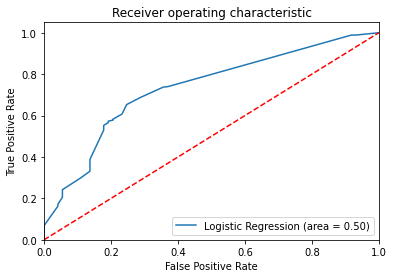

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
coefficients
#pd.DataFrame(data={'variable': ['intercept'] + list(new.columns), 'coefficient': coefficients})

array([12.30394538,  1.86080035, -0.50430247, -4.28924119, -8.6041297 ,
       -0.20566796, -0.20867282,  0.        , -0.31938038, -1.52520482,
       -0.93646131, -1.52284657, -3.88589585,  0.        , -6.20733974,
        0.        , -5.64164905,  7.5597476 ,  0.32465839, -0.54355783,
       -0.54355783])

In [ ]:
clf = LogisticRegression(penalty='none')
clf.fit(X, y)
test_prob = clf.predict_proba(x_test)[:, 1]
test_pred = clf.predict(x_test)
test_pred

In [ ]:
plot_roc_curve(clf, x_test, y_test)

In [ ]:
plot_precision_recall_curve(clf, x_test, y_test)

In [ ]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.31313
AUC = 0.75056
Average Precision = 0.95223

Using 0.5 as threshold:
Accuracy = 0.88650
Precision = 0.88627
Recall = 1.00000
F1 score = 0.93971

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        59
           1       0.89      1.00      0.94       452

    accuracy                           0.89       511
   macro avg       0.94      0.51      0.49       511
weighted avg       0.90      0.89      0.84       511



Categorization by definition

In [ ]:
###########################
first financing deal type 
###########################

(1)okay
'Accelerator/Incubator'
'Angel (individual)'
'Early Stage VC'
'Grant'
'Later Stage VC'

'IPO'
'Merger of Equals' 
'Joint Venture'
'Merger/Acquisition'
'PE Growth/Expansion'

'PIPE'
'Platform Creation'
'Reverse Merger'
'Seed Round'
'Spin-Off'

(2)bad
'Asset Divestiture (Corporate)'
'Convertible Debt' 
'Debt - General'
'Debt - PPP'
'Out of Business'

(3) uncetain 
'Buyout/LBO'
'Capitalization'

'Corporate'
'Corporate Asset Purchase'
'Undetermined'

(4) not appeared in list for last financing deal type 
1. good 
'Spin-Off'
2. bad 
'Asset Divestiture (Corporate)'
3. uncertain 
'Mezzanine'



In [ ]:
###########################
first financing deal type 2
###########################
(1) good 
'Acquisition Financing'
'Angel (individual)'
'Seed Round'
'Series 1'
'Series A'
'Series A1'
'Series A2'
'Series AA'
'Series B'
'Series B2'
'Series C'
'Series F'
'Spin-Off'

(2) uncertain 
'Add-on'
'Corporate'


(3) bad 
'Asset Acquisition'
'Corporate Divestiture'
'Management Buy-In'
'Management Buyout'
'Recapitalization' (recapitalization might be a great thing becasse they need to redistribute different types of equity and debt)


In [ ]:
list_f=list(final['first financing deal type 2'])
us,cs=np.unique(list_f, return_counts=True)
final_na_first_2=final[~final['first financing deal type 2'].isna()]
### for when first financing deal type is not there in a dataset ### 
final_na_first_2[final_na_first_2['first financing deal type'].isna()].shape
### for when last financing deal type is not there in a dataset ### 
final_na_first_2[final_na_first_2['last financing deal type'].isna()].shape


Last financing deal type 

In [ ]:
final_na=final[~final['last financing deal type'].isna()]

In [ ]:
bad_category_type_last=['Accelerator/Incubator', 'Individual', 'Corporate Divestiture', 'Dividend Recapitalization'
,'Out of Business','Bankruptcy: Admin/Reorg', 'Bankruptcy: Liquidation', 
'Debt', 'Debt - General', 'Debt - PPP', 'Debt Refinancing', 'Other', 'Undetermined']
bad_category_type_last2=['Asset Acquisition', 'Corporate', 'Corporate Divestiture', 'Management Buy-In']



Categorization by definition


In [ ]:

founding years within 15 years --> defined as startup in healthcare 

Considering multinomial logistic regression? 

###########################
last financing deal type 
###########################

Entry level 
(1)bad 
'Accelerator/Incubator', 'Individual'
(2) uncertain 
'Angel (individual)', 'Grant'
(3) good 
'Early Stage VC','Seed Round','Series A', 'Series B'

Corporate 
(1) Good 
'Corporate'
(2) Unceratain
'Corporate Asset Purchase' 
(purchsse assets excluding ones with liability and risks, but more legal documents to deal with)
(3) bad                                     
'Corporate Divestiture' (redundancy/unefficiency which leads to cutting of the business)


Investment strategy 
(1) uncertain 
'Buyout/LBO'
#repackacginf plan: re-IPO through loans 
#split up plan:] dismantal business (quite bad)
#portfolio plan: buying off competitor for synergy 
#savior plan: saving business by its management (consequence not as good as expected)
'Investor Buyout by Management'
#management better equipped to help the company grow
#key exit strategies: 
#(1)large corproations: sell off unprofitable assets or no use 
#(2) private business owners retire 

(2) bad 
'Dividend Recapitalization'
# takes on new debt in order to pay a special dividend to private investors or shareholders
# not a great practice for firms themselves, but becoming good money making cows 

(3) good 
'Acquisition Financing'
#big companies acquiring small company so that small company can reach economics of sacles  
'Share Repurchase'
#stock undervalues, so repurchse to increase stock values 
'Platform Creation'


Collaboration 
(1)good
'Merger of Equals'
#help create synergies 
'Joint Venture'
#partnership, common in local businesses look for global expansion 
'Reverse Merger'
#famous xample such as dell 


Public Help 
(1) uncertain 
'Equity Crowdfunding'
#more regulation but wider access to investors' poool 
'PIPE'
#public investment by acrredited investors or institutions, with risk in diluded stock values 
'Secondary Transaction - Open Market'
'Secondary Transaction - Private'

Typical indicator of success of startups 

(1) good 
'IPO', 'Later Stage VC', 'Merger/Acquisition', 'PE Growth/Expansion', 'Series C', 'Series D', 
'Series E', 'Series F'

(2) Uncertain 
'Private Equity'
'Public Investment 2nd Offering'
'Venture Capital'

(3) bad 
'Out of Business'
'Bankruptcy: Admin/Reorg'
'Bankruptcy: Liquidation' 
'Debt'
'Debt - General'
'Debt - PPP'
'Debt Refinancing'

Other 
(1) uncertain/bad 
'Other','Undetermined'


In [ ]:
###########################
Last financing deal type 2


    
    'Public to Private',
       'Secondary Buyout', 
###########################


(1) good 
'Acquisition Financing'
'Angel (individual)'
'Seed Round'
'Series 2'
'Series A'
'Series A1'
'Series A2'
'Series A3'
'Series B' 
'Series B1'
'Series C'
'Series C1'
'Series D'
'Series E'
'Series F'
'Series G'

(2) uncertain 
'Add-on'
'Distressed Acquisition'


(3) bad 
'Asset Acquisition'
'Corporate'
'Corporate Divestiture'
'Management Buy-In'




In [ ]:
list_f=list(final['Last financing deal type 2'])
us,cs=np.unique(list_f, return_counts=True)
final_na_first_2=final[~final['Last financing deal type 2'].isna()]
### only available for when first financing deal type is not there in a dataset ### 
final_na_first_2[final_na_first_2['first financing deal type'].isna()].shape
us


array(['Acquisition Financing', 'Add-on', 'Angel (individual)',
       'Asset Acquisition', 'Corporate', 'Corporate Divestiture',
       'Distressed Acquisition', 'Management Buy-In', 'Public to Private',
       'Secondary Buyout', 'Seed Round', 'Series 2', 'Series A',
       'Series A1', 'Series A2', 'Series A3', 'Series B', 'Series B1',
       'Series C', 'Series C1', 'Series D', 'Series E', 'Series F',
       'Series G', 'nan'], dtype='<U32')

**Logistic Model Strategy**

In [ ]:
Y variables: 

logic: 
(1) reaching metric of success 
(2) reaching metric of success within 14 years 
(3) not reaching metric of failure
(4) not reaching metric of failure within 14 years 



last: 
(1) after series c (c, d, e, f, g)
(2) later stage VC
(3) merger/acquisition
(4) IPO
(5) PE Growth/Expansion 
(6) merger of equals

--> within 14 years ???

Failed --> 
(1) Bankruptcy: Liquidation
(2) Coprate divestiture
(3) debt 
(4) debt - general 

--> probability of faiuire
--> or firms without reaching these 4 situation within 14 years 

first: 
(1) debt
(2) debt-general
(3) debt - ppp already 

--> probability of failure



In [ ]:
x variables

legal:
type_entity (coporation)
date incorporation 
state of incoporation (delaware) 

clustering: 
local 
traded 
industrial clusters (US Mapping Project)

number of name (short name)
specific word included in name 
directing manger's name included (eponymous)


total patents 



**Plan for model**


In [ ]:
import statsmodels.api as sm 
from statsmodels.formula.api import logit

In [ ]:
formula =("y_varaible~x1+x2+...")
model=logit(formula=formula, data=final).fit()

ideas:gridsearch, turn categorization into 1/0, data ajustment